## Noisy

In this example I will show you how the activation of noise mitigation affects the circuits.



In [18]:
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_gate_map


def define_backend(qbits,coupling,basis):
    backend = GenericBackendV2(num_qubits=qbits, coupling_map=coupling, basis_gates=basis)

    print(f'Coupling: {coupling}')
    print(f'Basis: {basis}')
    
    display(plot_gate_map(backend))
    return backend

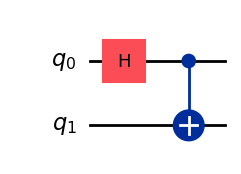

In [44]:
from qiskit import QuantumCircuit, QuantumRegister

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')


In [20]:
# from qiskit import QuantumCircuit,transpile
# from qiskit.quantum_info import SparsePauliOp
# from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

# # Initialize the service (you need IBM credentials/config)
# service = QiskitRuntimeService()

# # Pick a backend via the service
# backend = service.least_busy(simulator=False, operational=True)
# print(backend)




Coupling: [[0, 3], [1, 4], [2, 5], [3, 6], [4, 7], [5, 0], [6, 1], [7, 2], [3, 0], [4, 1], [5, 2], [6, 3], [7, 4], [0, 5], [1, 6], [2, 7]]
Basis: ['x', 'h', 's', 'z', 'rx', 'cx', 'reset', 'delay', 'measure']


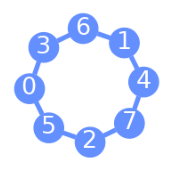

In [60]:
qbits = 8
coupling = (
    [[i,(i+3) % qbits] for i in range(qbits)]+
    [[(i+3) % qbits,i] for i in range(qbits)]
)
basis = ['x','h','s','z','rx','cx'] #,'ry','rz','cx','cy','cz']
backend = define_backend(qbits,coupling,basis)

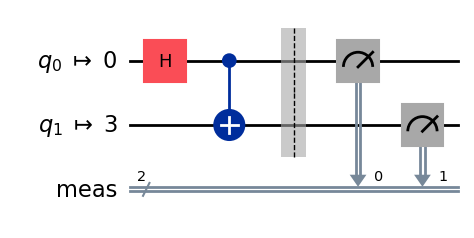

In [61]:
# Create the Estimator primitive in “mode” specifying the backend
options={
        "resilience_level": 2  # 0 = none, 1 = measurement mitigation, 2 = ZNE, 3 = advanced
    }
estimator = Estimator(mode=backend, options = options)
estimator.options.dynamical_decoupling.enable = True
estimator.options.dynamical_decoupling.sequence_type= "XpXm"

# Build a circuit and observable(s)
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

obs = SparsePauliOp.from_list([("I"*6+"ZZ", 1.0)])

# Run the estimator
qct = transpile(qc,backend,)
qct.draw('mpl')

In [62]:
job = estimator.run([(qct, obs)], precision=0.001)

result = job.result()
print(result)

/home/genaro/Documents/qiskit2/lib/python3.10/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:187: UserWarning: The resilience_level option has no effect in local testing mode.
  warnings.warn("The resilience_level option has no effect in local testing mode.")
/home/genaro/Documents/qiskit2/lib/python3.10/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:269: UserWarning: Options {'dynamical_decoupling': {'enable': True, 'sequence_type': 'XpXm'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.float64(0.000999992863332534)), metadata={'target_precision': 0.001, 'shots': 1000000, 'circuit_metadata': {}})], metadata={'version': 2})


In [63]:
result[0]

PubResult(data=DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.float64(0.000999992863332534)), metadata={'target_precision': 0.001, 'shots': 1000000, 'circuit_metadata': {}})

In [64]:
result[0].data

DataBin(evs=np.ndarray(<shape=(), dtype=float64>), stds=np.float64(0.000999992863332534))

In [65]:
result[0].data.evs

array(0.003778)